This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/sot.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sot/ref/m.dat &> /dev/null

# SOT demo

## Run Simulation

In [2]:
from magnumnp import *
import torch
import pathlib
from tqdm import tqdm

set_log_level(25) # show info_green, but hide info_blue
Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

# initialize state
dt = 1e-12
n  = (1, 1, 1)
dx = (1.0e-9, 1.0e-9, 1e-9)
mesh = Mesh(n, dx)
state = State(mesh)

# initialize polarization, p, and charge current amplitude
# thickness of thin film on which the SOT acts
p = torch.tensor([0.,-1.,0.])
je = 6.9e10
d = n[2] * dx[2]
Keff = 1200e3*constants.mu_0*0.4/2./constants.mu_0

state.material = {
    "Ms": 1200e3,
    "A": 15e-12,
    "Ku": Keff,
    "Ku_axis": [0., 0., 1.],
    "gamma": 2.211e5,
    "alpha": 0.048,
    "eta_damp": -0.1, # both eta with opposite sign as magnum.af, same as magnum.pi
    "eta_field": 0.3,
    "p": p,
    "d": d,
    "je": je}

# initialize field terms
exchange = ExchangeField()
aniso = UniaxialAnisotropyField()
torque = SpinOrbitTorque()

# initialize magnetization that relaxes into s-state
state.m = state.Constant([0.,0.,1.])

# relax without external field
minimizer = MinimizerBB([exchange, aniso])
minimizer.minimize(state)

# perform integration with external field
state.t = 0.
llg = LLGSolver([exchange, torque, aniso])
logger = Logger(this_dir / "data", ['t', 'm', torque.h])

for i in tqdm(torch.arange(0, 1e-9, dt)):
    llg.step(state, dt)
    logger << state

Timer.print_report()

2024-11-05 13:29:13  magnum.np:INFO magnum.np 2.0.1


2024-11-05 13:29:13  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2024-11-05 13:29:13  magnum.np:INFO [Mesh] 1x1x1 (dx= 1e-09 x 1e-09 x 1e-09)


2024-11-05 13:29:24  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)


  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 1/1001 [00:03<54:26,  3.27s/it]

  1%|          | 12/1001 [00:03<03:21,  4.90it/s]

  2%|▏         | 24/1001 [00:03<01:26, 11.35it/s]

  4%|▎         | 36/1001 [00:03<00:49, 19.34it/s]

  5%|▍         | 47/1001 [00:03<00:34, 27.90it/s]

  6%|▌         | 58/1001 [00:03<00:25, 37.60it/s]

  7%|▋         | 70/1001 [00:03<00:18, 49.30it/s]

  8%|▊         | 82/1001 [00:03<00:15, 60.84it/s]

  9%|▉         | 93/1001 [00:04<00:12, 69.95it/s]

 10%|█         | 104/1001 [00:04<00:11, 77.28it/s]

 11%|█▏        | 115/1001 [00:04<00:10, 82.58it/s]

 13%|█▎        | 126/1001 [00:04<00:09, 88.83it/s]

 14%|█▎        | 137/1001 [00:04<00:09, 92.33it/s]

 15%|█▍        | 148/1001 [00:04<00:08, 95.62it/s]

 16%|█▌        | 159/1001 [00:04<00:08, 97.68it/s]

 17%|█▋        | 170/1001 [00:04<00:08, 100.96it/s]

 18%|█▊        | 181/1001 [00:04<00:07, 102.97it/s]

 19%|█▉        | 192/1001 [00:05<00:07, 104.31it/s]

 20%|██        | 204/1001 [00:05<00:07, 106.72it/s]

 22%|██▏       | 216/1001 [00:05<00:07, 108.28it/s]

 23%|██▎       | 228/1001 [00:05<00:07, 109.60it/s]

 24%|██▍       | 240/1001 [00:05<00:07, 107.80it/s]

 25%|██▌       | 251/1001 [00:05<00:07, 106.69it/s]

 26%|██▋       | 263/1001 [00:05<00:06, 109.04it/s]

 27%|██▋       | 274/1001 [00:05<00:06, 107.48it/s]

 28%|██▊       | 285/1001 [00:05<00:06, 106.86it/s]

 30%|██▉       | 296/1001 [00:06<00:06, 106.01it/s]

 31%|███       | 307/1001 [00:06<00:06, 106.07it/s]

 32%|███▏      | 318/1001 [00:06<00:06, 105.43it/s]

 33%|███▎      | 329/1001 [00:06<00:06, 105.92it/s]

 34%|███▍      | 340/1001 [00:06<00:06, 106.89it/s]

 35%|███▌      | 351/1001 [00:06<00:06, 107.57it/s]

 36%|███▌      | 362/1001 [00:06<00:06, 106.22it/s]

 37%|███▋      | 373/1001 [00:06<00:05, 106.99it/s]

 38%|███▊      | 384/1001 [00:06<00:05, 107.13it/s]

 39%|███▉      | 395/1001 [00:06<00:05, 107.33it/s]

 41%|████      | 406/1001 [00:07<00:05, 106.16it/s]

 42%|████▏     | 417/1001 [00:07<00:05, 106.67it/s]

 43%|████▎     | 428/1001 [00:07<00:05, 105.99it/s]

 44%|████▍     | 439/1001 [00:07<00:05, 104.02it/s]

 45%|████▍     | 450/1001 [00:07<00:05, 103.88it/s]

 46%|████▌     | 461/1001 [00:07<00:05, 101.87it/s]

 47%|████▋     | 472/1001 [00:07<00:05, 102.26it/s]

 48%|████▊     | 483/1001 [00:07<00:05, 102.81it/s]

 49%|████▉     | 494/1001 [00:07<00:04, 102.65it/s]

 50%|█████     | 505/1001 [00:08<00:04, 102.40it/s]

 52%|█████▏    | 516/1001 [00:08<00:04, 103.30it/s]

 53%|█████▎    | 527/1001 [00:08<00:04, 103.74it/s]

 54%|█████▎    | 538/1001 [00:08<00:04, 103.62it/s]

 55%|█████▍    | 549/1001 [00:08<00:04, 105.41it/s]

 56%|█████▌    | 561/1001 [00:08<00:04, 106.68it/s]

 57%|█████▋    | 573/1001 [00:08<00:03, 107.46it/s]

 58%|█████▊    | 584/1001 [00:08<00:03, 106.54it/s]

 59%|█████▉    | 595/1001 [00:08<00:03, 105.65it/s]

 61%|██████    | 607/1001 [00:08<00:03, 107.91it/s]

 62%|██████▏   | 618/1001 [00:09<00:03, 108.34it/s]

 63%|██████▎   | 629/1001 [00:09<00:03, 106.69it/s]

 64%|██████▍   | 640/1001 [00:09<00:03, 106.31it/s]

 65%|██████▌   | 651/1001 [00:09<00:03, 105.78it/s]

 66%|██████▌   | 663/1001 [00:09<00:03, 108.00it/s]

 67%|██████▋   | 675/1001 [00:09<00:02, 111.30it/s]

 69%|██████▊   | 687/1001 [00:09<00:02, 110.14it/s]

 70%|██████▉   | 699/1001 [00:09<00:02, 109.45it/s]

 71%|███████   | 711/1001 [00:09<00:02, 111.30it/s]

 72%|███████▏  | 723/1001 [00:10<00:02, 109.82it/s]

 73%|███████▎  | 734/1001 [00:10<00:02, 106.16it/s]

 75%|███████▍  | 746/1001 [00:10<00:02, 107.48it/s]

 76%|███████▌  | 757/1001 [00:10<00:02, 106.12it/s]

 77%|███████▋  | 768/1001 [00:10<00:02, 106.78it/s]

 78%|███████▊  | 780/1001 [00:10<00:02, 108.76it/s]

 79%|███████▉  | 791/1001 [00:10<00:01, 107.92it/s]

 80%|████████  | 802/1001 [00:10<00:01, 106.87it/s]

 81%|████████  | 813/1001 [00:10<00:01, 105.59it/s]

 82%|████████▏ | 824/1001 [00:10<00:01, 106.23it/s]

 84%|████████▎ | 836/1001 [00:11<00:01, 107.57it/s]

 85%|████████▍ | 847/1001 [00:11<00:01, 107.82it/s]

 86%|████████▌ | 859/1001 [00:11<00:01, 109.52it/s]

 87%|████████▋ | 871/1001 [00:11<00:01, 110.49it/s]

 88%|████████▊ | 883/1001 [00:11<00:01, 112.04it/s]

 89%|████████▉ | 895/1001 [00:11<00:00, 112.53it/s]

 91%|█████████ | 907/1001 [00:11<00:00, 112.79it/s]

 92%|█████████▏| 919/1001 [00:11<00:00, 112.19it/s]

 93%|█████████▎| 931/1001 [00:11<00:00, 112.22it/s]

 94%|█████████▍| 943/1001 [00:12<00:00, 111.33it/s]

 95%|█████████▌| 955/1001 [00:12<00:00, 112.10it/s]

 97%|█████████▋| 967/1001 [00:12<00:00, 112.88it/s]

 98%|█████████▊| 980/1001 [00:12<00:00, 115.47it/s]

 99%|█████████▉| 993/1001 [00:12<00:00, 117.02it/s]

100%|██████████| 1001/1001 [00:12<00:00, 79.87it/s]


TIMER REPORT
Operation                        No of calls    Avg time [ms]    Total time [s]
-----------------------------  -------------  ---------------  ----------------
MinimizerBB.minimize                       1    10869.5              10.8695
    ExchangeField.h                        2     3993.82              7.98764
    UniaxialAnisotropyField.h              2     1440.4               2.88081
LLGSolver.step                          1001        8.96281           8.97178
    ExchangeField.h                    12030        0.0849107         1.02148
    SpinOrbitTorque.h                  12030        0.331928          3.9931
    UniaxialAnisotropyField.h          12030        0.0552543         0.664709
SpinOrbitTorque.h                       1001        0.0907278         0.0908186
-----------------------------  -------------  ---------------  ----------------
Total                                                                23.4158
Missing                                     

## Plot Results

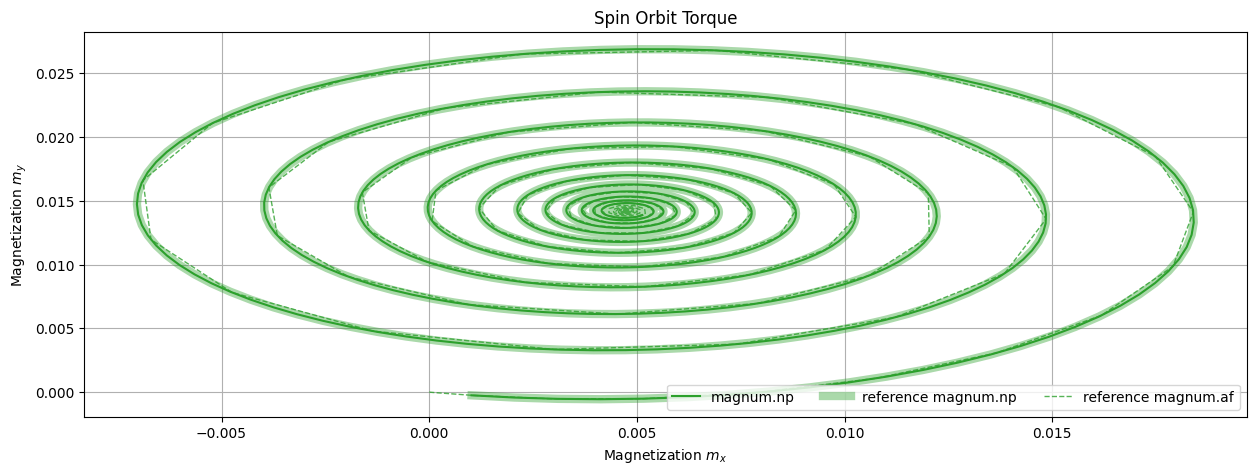

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
ref_np = np.loadtxt("ref/ref_magnumnp.dat")
ref_af = np.loadtxt("ref/ref_magnumaf.dat")

fig, ax = plt.subplots(figsize=(15,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,1], data[:,2], '-', color = cycle[2], label = "magnum.np")
ax.plot(ref_np[:,1], ref_np[:,2], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference magnum.np")
ax.plot(ref_af[:,1], ref_af[:,2], '--', color = cycle[2], linewidth = 1, alpha = 0.8, label = "reference magnum.af")

ax.set_title("Spin Orbit Torque")
ax.set_xlabel("Magnetization $m_x$")
ax.set_ylabel("Magnetization $m_y$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")